# <font color='red' style='font-size: 30px;'> Dados dos Boletins Epidemiológicos </font>
<hr style='border: 2px solid red;'>

## <font color = 'black' style='font-size: 26px;'> Imports </font>  
<hr style = 'border: 1.5px solid black;'>

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

## <font color = 'black' style='font-size: 26px;'> Datasets </font>  
<hr style = 'border: 1.5px solid black;'>

In [5]:
def import_city_data(path, city, columns, format):
    if format == 'xlsx':
        df = pd.read_excel(path, usecols=columns)
        df.loc[:, 'DATA'] = pd.to_datetime(df['DATA'])
    elif format == 'csv':
        df = pd.read_csv(path, sep=';', usecols=columns)
        df.loc[:, 'DATA'] = pd.to_datetime(df['DATA'], format="%d/%m/%Y")
    df = df.query("MUNICIPIO_RESIDENCIA == @city")
    df = df.fillna(0)
    return df

In [6]:
df1 = pd.concat([import_city_data('../Dados/XLSX_Painel_2020.xlsx', 'UBERLANDIA', ['MUNICIPIO_RESIDENCIA', 'DATA', 'CONFIRMADOS', 'RECUPERADOS'], 'xlsx'), 
                import_city_data('../Dados/XLSX_Painel_2021.xlsx', 'UBERLANDIA', ['MUNICIPIO_RESIDENCIA', 'DATA', 'CONFIRMADOS', 'RECUPERADOS'], 'xlsx')],
                axis=0)
df1.head(3)

,MUNICIPIO_RESIDENCIA,DATA,CONFIRMADOS,RECUPERADOS
11,UBERLANDIA,2020-03-17,1,0.0
30,UBERLANDIA,2020-03-21,2,0.0
45,UBERLANDIA,2020-03-23,3,0.0


In [7]:
df2 = pd.concat([import_city_data('../Dados/CSV_Painel_2020_OBITOS.csv', 'UBERLANDIA', ['MUNICIPIO_RESIDENCIA', 'DATA', 'NUM_OBITOS'], 'csv'),
                import_city_data('../Dados/CSV_Painel_2021_OBITOS.csv', 'UBERLANDIA', ['MUNICIPIO_RESIDENCIA', 'DATA', 'NUM_OBITOS'], 'csv')],
                axis=0)
df2.head(3)

,MUNICIPIO_RESIDENCIA,NUM_OBITOS,DATA
196,UBERLANDIA,0,2020-03-19
400,UBERLANDIA,0,2020-03-26
604,UBERLANDIA,0,2020-03-28


In [8]:
df_merge = pd.merge(df1, df2, on=['MUNICIPIO_RESIDENCIA', 'DATA'], how='inner')
df_merge.fillna(0, inplace=True)
df_merge.head(4)

,MUNICIPIO_RESIDENCIA,DATA,CONFIRMADOS,RECUPERADOS,NUM_OBITOS
0,UBERLANDIA,2020-03-29,3,0.0,0
1,UBERLANDIA,2020-03-30,1,0.0,0
2,UBERLANDIA,2020-03-31,4,0.0,0
3,UBERLANDIA,2020-04-01,8,0.0,0


## <font color = 'black' style='font-size: 26px;'> Manipulando os Dados </font>  
<hr style = 'border: 1.5px solid black;'>

In [10]:
# População Uberlkândia
population = 713224
nodes = 127248
ratio = nodes / population
ratio

0.17841239217973595

In [11]:
infected_accumulations = []
dead_accumulations = []

In [12]:
confirmed = df_merge['CONFIRMADOS'].to_list()
death = df_merge['NUM_OBITOS'].to_list()

In [13]:
for i in range(len(confirmed)):
    if i == 0:
        infected_accumulations.append(confirmed[i])
        dead_accumulations.append(death[i])
    else:
        infected_accumulations.append((confirmed[i] + infected_accumulations[i-1]))
        dead_accumulations.append((death[i] + dead_accumulations[i-1]))

In [14]:
df_merge['REFRATARIOS'] = dead_accumulations + df_merge['RECUPERADOS']
df_merge['INFECTADOS'] = infected_accumulations - df_merge['REFRATARIOS']
df_merge['SUCETIVEIS'] = population - df_merge['INFECTADOS'] - df_merge['REFRATARIOS']

In [15]:
df_data_range = df_merge[(df_merge['DATA'] >= '2021-08-15') & (df_merge['DATA'] <= '2021-09-15')]
df_data_range.head(4)

,MUNICIPIO_RESIDENCIA,DATA,CONFIRMADOS,RECUPERADOS,NUM_OBITOS,REFRATARIOS,INFECTADOS,SUCETIVEIS
489,UBERLANDIA,2021-08-15,272,105362.0,11,108243.0,7201.0,597780.0
490,UBERLANDIA,2021-08-16,282,105651.0,3,108535.0,7191.0,597498.0
491,UBERLANDIA,2021-08-17,226,105922.0,11,108817.0,7135.0,597272.0
492,UBERLANDIA,2021-08-18,226,106207.0,12,109114.0,7064.0,597046.0


In [16]:
df_data_range.describe()

,DATA,CONFIRMADOS,RECUPERADOS,NUM_OBITOS,REFRATARIOS,INFECTADOS,SUCETIVEIS
count,32,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2021-08-30 12:00:00,230.062500,110534.906250,5.500000,113511.625000,5757.812500,593954.562500
min,2021-08-15 00:00:00,0.000000,105362.000000,0.000000,108243.000000,4291.000000,590690.000000
25%,2021-08-22 18:00:00,176.750000,108033.500000,3.000000,110974.250000,5019.750000,592067.500000
50%,2021-08-30 12:00:00,228.000000,110729.000000,5.500000,113709.500000,5626.000000,593888.500000
75%,2021-09-07 06:00:00,284.500000,113120.000000,7.000000,116136.750000,6602.750000,595647.000000
max,2021-09-15 00:00:00,490.000000,115197.000000,13.000000,118243.000000,7201.000000,597780.000000
std,NaN,114.390372,3079.972982,3.793033,3129.356759,942.378235,2190.012991


In [17]:
df_data_range

,MUNICIPIO_RESIDENCIA,DATA,CONFIRMADOS,RECUPERADOS,NUM_OBITOS,REFRATARIOS,INFECTADOS,SUCETIVEIS
489,UBERLANDIA,2021-08-15,272,105362.0,11,108243.0,7201.0,597780.0
490,UBERLANDIA,2021-08-16,282,105651.0,3,108535.0,7191.0,597498.0
491,UBERLANDIA,2021-08-17,226,105922.0,11,108817.0,7135.0,597272.0
492,UBERLANDIA,2021-08-18,226,106207.0,12,109114.0,7064.0,597046.0
493,UBERLANDIA,2021-08-19,295,106576.0,13,109496.0,6977.0,596751.0
494,UBERLANDIA,2021-08-20,294,106926.0,6,109852.0,6915.0,596457.0
495,UBERLANDIA,2021-08-21,297,107351.0,6,110283.0,6781.0,596160.0
496,UBERLANDIA,2021-08-22,294,107741.0,5,110678.0,6680.0,595866.0
497,UBERLANDIA,2021-08-23,292,108131.0,5,111073.0,6577.0,595574.0
498,UBERLANDIA,2021-08-24,0,108131.0,7,111080.0,6570.0,595574.0


In [18]:
df_export = pd.DataFrame()
df_export['Sucetiveis'] = round(df_data_range['SUCETIVEIS'] * ratio).astype(int)
df_export['Infectados'] = round(df_data_range['INFECTADOS'] * ratio).astype(int)
df_export['Recuperados'] = round(df_data_range['REFRATARIOS'] * ratio).astype(int)

In [19]:
df_export

,Sucetiveis,Infectados,Recuperados
489,106651,1285,19312
490,106601,1283,19364
491,106561,1273,19414
492,106520,1260,19467
493,106468,1245,19535
494,106415,1234,19599
495,106362,1210,19676
496,106310,1192,19746
497,106258,1173,19817
498,106258,1172,19818


In [20]:
df_export.to_csv("amostragem_uberlandia_2021-08-15_2021-09-15.csv", header=False, index=False)

<Axes: >

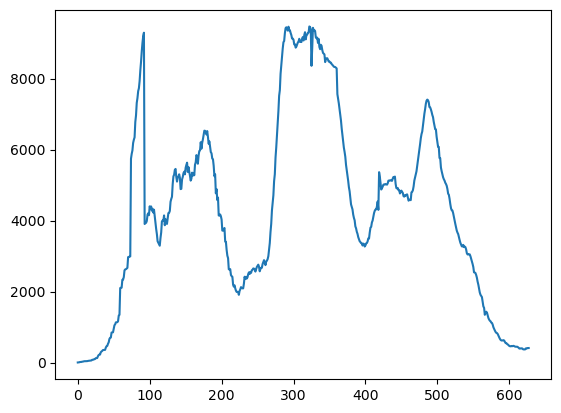

In [21]:
df_merge['INFECTADOS'].plot()

<Axes: >

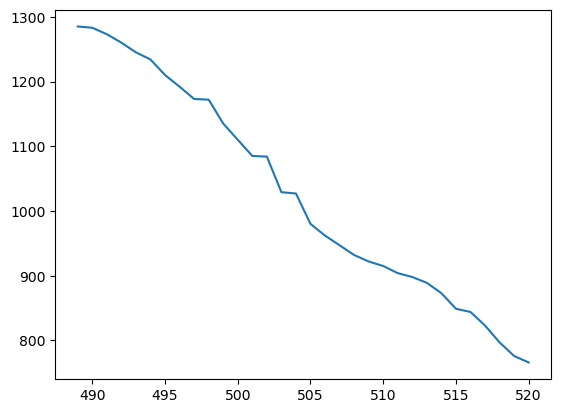

In [22]:
df_export['Infectados'].plot()